In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
cancerdata= load_breast_cancer()
# data=pd.DataFrame(cancerdata)

In [4]:
cancerdata.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data= pd.DataFrame(data=cancerdata.data, columns=cancerdata.feature_names)
data['lable']=cancerdata.target
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,lable
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
#Checking null 
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
lable                      0
dtype: int64

Number of Benign patients 357
Number of Malignant patients 212


<Axes: xlabel='lable', ylabel='count'>

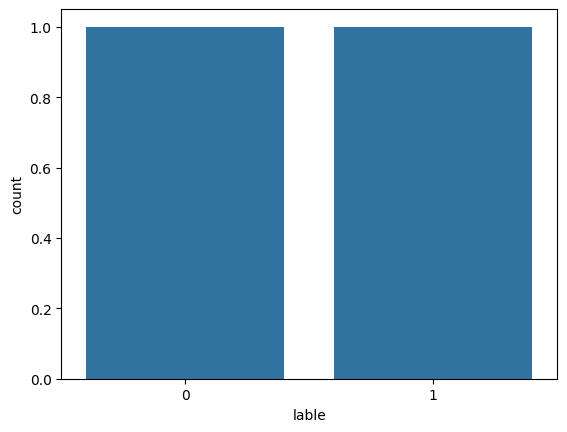

In [43]:
import seaborn as sns
benign,malignant = data['lable'].value_counts()

print("Number of Benign patients", benign)
print("Number of Malignant patients", malignant)
sns.countplot(data['lable'].value_counts())



In [7]:
data.shape

(569, 31)

In [8]:
data['lable'].value_counts()

lable
1    357
0    212
Name: count, dtype: int64

In [9]:
X = data.iloc[:, 1:30].values
Y = data.iloc[:, 30].values


In [10]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Logestics

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm
accuracy=accuracy_score(Y_test, Y_pred)
accuracy

C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9440559440559441

# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
classifier1.fit(X_train, Y_train)
Y_pred1 = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred1)
cm1
accuracy=accuracy_score(Y_test, Y_pred1)
accuracy

0.9440559440559441

# rf

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, Y_train)
Y_pred2 = classifier2.predict(X_test)
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(Y_test, Y_pred2)
cm2
accuracy=accuracy_score(Y_test, Y_pred2)
accuracy

0.951048951048951

In [19]:
Y_pred = classifier.predict(X_test)

In [24]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, Y_train)
Y_pred3 = classifier3.predict(X_test)
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(Y_test, Y_pred3)
cm3
accuracy=accuracy_score(Y_test, Y_pred3)
accuracy

0.9300699300699301

In [22]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(X_train, Y_train)
Y_pred4 = classifier4.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred4)
accuracy=accuracy_score(Y_test, Y_pred4)
accuracy

0.9370629370629371

as we can see from the above accuracy results that the random forest is givig 95 percentage accuracy and going forward wewill be using this model to predict the cancer chances'

In [ ]:
S